# Open Food Facts Exploratory Data Analysis (EDA)

## 1. Context

Exploratory Data Analysis (EDA) serves as a vital starting point in the analysis of OpenFoodFacts data. Its primary aim is to thoroughly grasp the dataset, uncover patterns, spot anomalies, and generate hypotheses. Below are the essential steps typically involved in conducting EDA:

## 2. Collect data
Open Food Facts is a free, open, collbarative database of food products from around the world, with ingredients, allergens, nutrition facts and all the tidbits of information we can find on product labels.

Link: https://world.openfoodfacts.org/data

## 3. Load data
Import the data into your analysis environment.

Note: update the file path 'en.openfoodfacts.org.products.tsv' with the appropriate path to your tab-separated file. This script is configured to read the file in segments of the specified size, monitor the progress, and merge these segments into a cohesive DataFrame called df.

In [11]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline
sns.set(style='white')

In [9]:
# load the .tsv file by specifying the tab separator and to not load the file by chunks (avoid mixed type inference)
file_path = r'..\res\en.openfoodfacts.org.products.csv'

In [10]:
# Define chunk size (number of rows to read at a time)
chunk_size = 10000

# Get the total number of rows in the file
with open(file_path, 'r', encoding='utf-8') as file:
    total_rows = sum(1 for _ in file)

# Initialize an empty list to store chunks
chunks = []

# Initialize a counter for progress tracking
progress = 0

# Read the file in chunks
for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):
    chunks.append(chunk)
    
    # Update progress
    progress += len(chunk)
    
    # Calculate and print progress percentage
    percent_progress = (progress / total_rows) * 100
    print(f"Progress: {percent_progress:.2f}%")

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 0.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 0.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 0.97%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 1.30%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 1.62%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 1.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 2.27%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 2.59%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,23,24,25,26,27,31,32,33,35,36,51) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 2.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 3.24%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 3.57%
Progress: 3.89%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 4.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 4.54%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,23,24,25,31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 4.86%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 5.19%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 5.51%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 5.84%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 6.16%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 6.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 6.81%
Progress: 7.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 7.46%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 7.78%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 8.11%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 8.43%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 8.75%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 9.08%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 9.40%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 9.73%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 10.05%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 10.38%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 10.70%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 11.02%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 11.35%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 11.67%
Progress: 12.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 12.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 12.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 12.97%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 13.29%
Progress: 13.62%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 13.94%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 14.27%
Progress: 14.59%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 14.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 15.24%
Progress: 15.56%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 15.89%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 16.21%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 16.54%
Progress: 16.86%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 17.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 17.51%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 17.83%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 18.16%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 18.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 18.81%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 19.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 19.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 19.78%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 20.10%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 20.43%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 20.75%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 21.08%
Progress: 21.40%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 21.72%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 22.05%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 22.37%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 22.70%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.02%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.35%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.67%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 23.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35,51,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 24.32%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (31,32,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 24.64%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 24.97%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 25.29%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 25.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 25.94%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 26.26%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 26.59%
Progress: 26.91%
Progress: 27.24%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 27.56%
Progress: 27.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 28.21%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 28.53%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 28.86%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 29.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 29.51%
Progress: 29.83%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 30.15%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 30.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 30.80%
Progress: 31.13%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 31.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 31.78%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 32.10%
Progress: 32.42%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,46,47,48,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 32.75%
Progress: 33.07%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 33.40%
Progress: 33.72%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 34.05%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 34.37%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 34.69%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.02%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.34%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.67%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 35.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 36.31%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 36.64%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 36.96%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 37.29%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 37.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 37.94%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 38.26%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 38.58%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 38.91%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 39.23%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 39.56%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 39.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 40.21%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 40.53%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 40.85%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 41.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 41.50%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 41.83%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 42.15%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 42.48%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 42.80%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 43.12%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 43.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 43.77%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 44.10%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 44.42%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 44.75%
Progress: 45.07%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 45.39%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 45.72%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 46.04%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 46.37%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 46.69%
Progress: 47.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 47.34%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 47.66%
Progress: 47.99%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (34,52,56,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 48.31%
Progress: 48.64%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 48.96%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 49.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 49.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 49.93%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 50.26%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 50.58%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 50.91%
Progress: 51.23%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 51.55%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 51.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 52.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 52.53%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 52.85%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 53.18%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 53.50%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 53.82%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 54.15%
Progress: 54.47%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 54.80%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 55.12%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 55.45%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 55.77%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 56.09%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 56.42%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 56.74%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 57.07%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 57.39%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 57.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 58.04%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 58.36%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 58.69%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.34%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.66%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 59.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 60.31%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 60.63%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 60.96%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 61.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 61.61%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 61.93%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 62.25%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 62.58%
Progress: 62.90%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 63.23%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 63.55%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 63.88%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 64.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 64.52%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 64.85%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 65.17%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 65.50%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 65.82%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 66.15%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 66.47%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 66.79%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 67.12%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 67.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 67.77%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 68.09%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 68.41%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 68.74%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 69.06%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 69.39%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 69.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 70.04%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 70.36%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 70.68%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.33%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.66%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 71.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 72.31%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,150) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 72.63%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 72.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 73.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 73.60%
Progress: 73.93%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 74.25%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 74.58%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 74.90%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 75.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 75.55%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 75.87%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 76.20%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 76.52%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 76.84%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 77.17%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 77.49%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 77.82%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 78.14%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 78.47%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 78.79%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 79.11%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 79.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 79.76%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 80.09%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 80.41%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 80.74%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 81.06%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 81.38%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 81.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 82.03%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 82.36%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 82.68%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.01%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.33%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 83.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 84.30%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 84.63%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 84.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 85.28%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 85.60%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 85.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 86.25%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 86.57%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 86.90%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 87.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 87.54%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 87.87%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 88.19%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 88.52%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 88.84%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 89.17%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 89.49%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 89.81%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 90.14%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 90.46%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 90.79%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,17,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 91.11%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 91.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 91.76%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 92.08%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 92.41%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 92.73%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,17,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 93.06%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 93.38%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 93.71%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 94.03%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 94.35%
Progress: 94.68%
Progress: 95.00%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 95.33%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 95.65%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 95.98%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 96.30%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 96.62%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,11,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 96.95%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (33,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 97.27%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 97.60%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 97.92%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 98.24%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 98.57%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 98.89%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 99.22%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (0,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 99.54%


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3610018773.py:15: DtypeWarning: Columns (11,17,67) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', encoding='utf-8', chunksize=chunk_size):


Progress: 99.87%
Progress: 99.99%


## 4. Summarize Data
Understand the basic properties of your dataset such as the number of observations (rows) and variables (columns), data types, missing values, etc.

Calculate summary statistics such as mean, median, mode, standard deviation, minimum, maximum, quartiles, etc., to get a general understanding of the data distribution.

The pandas DataFrame has 3083837 entries and 206 columns. It contains mostly float64 (128 columns), int64 (2 columns), and object (76 columns) data types, consuming approximately 4.7 GB of memory.

In [16]:
# get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083837 entries, 0 to 3083836
Columns: 206 entries, code to acidity_100g
dtypes: float64(128), int64(2), object(76)
memory usage: 4.7+ GB


In [19]:
nrows, ncols = df.shape
print('nrows: {}, ncols: {}'.format(nrows, ncols))

nrows: 3083837, ncols: 206


## 5. Handle Missing Values and Duplications
Identify and handle missing values appropriately and duplications, either by imputation (replacing missing values with a reasonable estimate) or removing them if they are too numerous.

In [20]:
# Drop observations with no data (safe cleaning)
df.dropna(how='all', inplace=True)

In [21]:
# Drop variables with no data (safe cleaning)
empty_variables = df.columns[df.isnull().sum() == df.shape[0]]
df.dropna(how='all', axis=1, inplace=True)

In [22]:
# Remove duplicates observations
duplicates_count = df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [24]:
print('Number of empty observations dropped: {}'.format(nrows - df.shape[0]))
print('Number of empty variables dropped: {}'.format(len(empty_variables)))
print('Variables dropped:\n{}'.format(empty_variables))
print('Number of duplicates dropped: {}'.format(duplicates_count))
print('\nDataset dimensions: {}'.format(df.shape))

Number of empty observations dropped: 0
Number of empty variables dropped: 2
Variables dropped:
Index(['allergens_en', 'additives'], dtype='object')
Number of duplicates dropped: 0

Dataset dimensions: (3083837, 204)


There were 2 variables with only NaN values.

## 6. Inspect Data Structure
For a clearer understanding of the dataset, we'll examine the variables separately, distinguishing between object and numerical types due to the numerous variables present.

In [28]:
# Increase the default number of rows displayed by pandas before truncation
pd.set_option('display.max_rows', 100)

# Get summary for object variables only
df.describe(include='object').T

,count,unique,top,freq
code,3083837,3079548,79200370213,3
url,3083837,3081436,http://world-en.openfoodfacts.org/product/3596...,2
creator,3083833,25212,kiliweb,1856096
created_datetime,3083837,2820739,2020-04-23T17:22:07Z,28
last_modified_datetime,3083837,2450691,2021-08-28T10:19:44Z,127
last_modified_by,2978387,29728,kiliweb,593404
last_updated_datetime,3059704,730573,2023-10-26T19:18:00Z,91
product_name,2936441,1831720,Miel,1720
abbreviated_product_name,24110,21630,Auchan jambon superieur dd sans cou,23
generic_name,153168,111352,Pâtes alimentaires de qualité supérieure,423


The dataset comprises over 3 million entries with 206 columns of various data types, including float64, int64, and object. It consumes approximately 4.7+ GB of memory. Many columns exhibit a wide range of unique values, suggesting diversity in the data. Some columns have sparse data, while others show frequent values, indicating common trends. Product attributes, temporal information, nutritional values, and quality control indicators are among the key aspects covered in the dataset.

In [29]:
# Define variables subset in which we don't want missing data
subset = [
    'code',
    'creator',
    'created_datetime',
    'last_modified_datetime',
    'states_tags'
]

# Drop observations with missing data in this subset
df.dropna(subset=subset, inplace=True)

# Drop the new variables with missing data that appear after the previous drop
df.dropna(how='all', axis=1, inplace=True)

print('Dataset shape: {}'.format(df.shape))

Dataset shape: (3083832, 203)


Note: 5 observations and 1 variable have been dropped.

In [25]:
# Convert 'code' column to string data type
df['code'] = df['code'].astype(str)

In [30]:
# Set the code as the index
df.set_index('code', inplace=True)

Temporal variables 'created_datetime' and 'last_modified_datetime' variables converted to datetime64 type.

In [31]:
# Convert the created_datetime & last_modified_datetime object variables to datetime variables
df.created_datetime = pd.to_datetime(df.created_datetime)
df.last_modified_datetime = pd.to_datetime(df.last_modified_datetime)

df.created_datetime.head()

code
00000000000000225        2021-06-16 14:53:28+00:00
0000000000000207025004   2022-07-04 15:30:10+00:00
00000000000003429145     2021-09-01 08:11:51+00:00
00000000000026772226     2022-06-03 09:58:31+00:00
0000000000017            2018-06-15 10:38:00+00:00
Name: created_datetime, dtype: datetime64[ns, UTC]

In [33]:
# Increase the default number of rows displayed by pandas before truncation
pd.set_option('display.max_rows', 100)

# Get summary for numerical variables only
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
created_t,3083832.0,1.597946e+09,6.740188e+07,1.328021e+09,1.552071e+09,1.608139e+09,1.652639e+09,1.707716e+09
last_modified_t,3083832.0,1.649525e+09,4.579484e+07,1.353582e+09,1.618911e+09,1.663786e+09,1.686048e+09,1.707716e+09
last_updated_t,3059699.0,1.696608e+09,2.699132e+07,1.537023e+09,1.705629e+09,1.705646e+09,1.707574e+09,1.707716e+09
serving_quantity,640081.0,1.909691e+28,1.527849e+31,0.000000e+00,2.800000e+01,5.700000e+01,1.210000e+02,1.222357e+34
nova_group,848274.0,3.333581e+00,1.017417e+00,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
...,...,...,...,...,...,...,...,...
inositol_100g,92.0,1.782242e+00,1.102415e+01,7.000000e-04,4.675000e-03,2.400000e-02,5.100000e-02,7.500000e+01
carnitine_100g,50.0,4.282720e-02,1.594917e-01,8.000000e-04,7.000000e-03,1.100000e-02,1.500000e-02,1.000000e+00
sulphate_100g,80.0,4.377118e-02,1.515694e-01,3.000000e-06,9.725000e-04,3.250000e-03,9.625000e-03,1.121000e+00
nitrate_100g,102.0,4.306064e-02,2.639514e-01,0.000000e+00,5.500000e-05,3.400000e-04,1.475000e-03,2.000000e+00


We'll drop observations with inconsistent values. Inconsistent data are erroneous entries.

In [36]:
# Convert 'fat_100g' and 'cocoa_100g' columns to numeric
df['fat_100g'] = pd.to_numeric(df['fat_100g'], errors='coerce')
df['cocoa_100g'] = pd.to_numeric(df['cocoa_100g'], errors='coerce')

# Drop rows where conversion to numeric failed
df = df.dropna(subset=['fat_100g', 'cocoa_100g'])

In [44]:
# Drop observations with negative values in numeric columns
obs_with_negative_facts = (df.loc[:, 'fat_100g':'cocoa_100g'] < 0).any(axis=1)
df.drop(df[obs_with_negative_facts].index, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5308\1315793406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[obs_with_negative_facts].index, inplace=True)


In [40]:
# Drop rows where conversion to numeric failed
obs_with_negative_facts = (df.loc[:, 'fat_100g':'cocoa_100g'] < 0).any(axis=1)
df_copy = df.loc[~obs_with_negative_facts].copy()

In [41]:
# Drop observations with facts that have value greater than 100g
obs_with_facts_gt_100 = (df_copy.loc[:, 'fat_100g':'cocoa_100g'] > 100).any(axis=1)
df_copy.drop(df_copy[obs_with_facts_gt_100].index, inplace=True)

In [42]:
print('Facts min value: {}'.format(df_copy.describe(include='number').T.loc['fat_100g':'cocoa_100g', 'min'].min()))
print('Facts max value: {}'.format(df_copy.describe(include='number').T.loc['fat_100g':'cocoa_100g', 'max'].max()))
print('Dataset shape: {}'.format(df_copy.shape))

Facts min value: 0.0
Facts max value: 100.0
Dataset shape: (7668, 202)


## 7. Visualize Data
Utilize various visualization techniques such as histograms, box plots, scatter plots, etc., to explore the distribution, relationships, and patterns within the data.

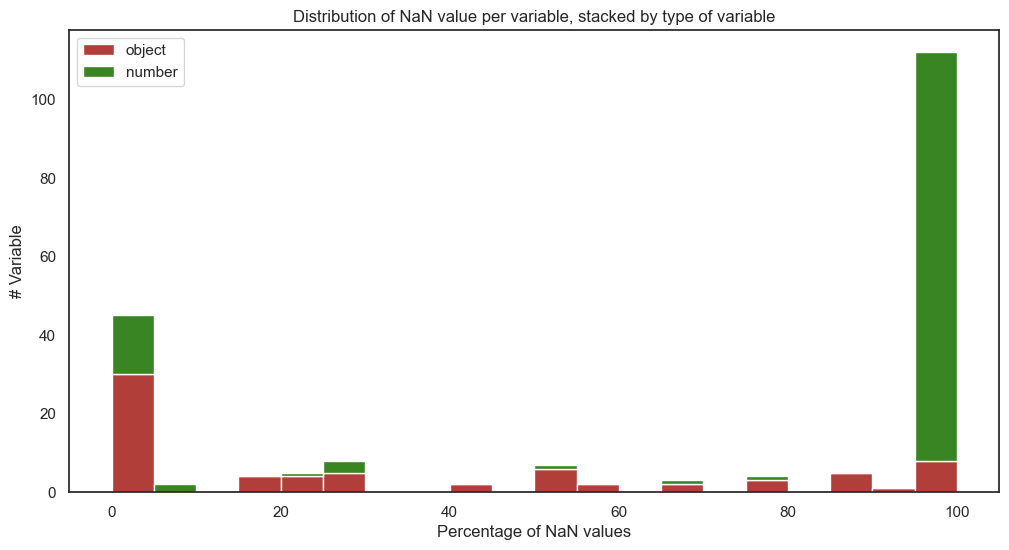

In [45]:
# Distribution of missing values per variable, stacked by type of variable
nan_counts_object_vars = df.select_dtypes('object').isnull().sum() / df.shape[0] * 100
nan_counts_number_vars = df.select_dtypes('number').isnull().sum() / df.shape[0] * 100

pd.DataFrame({'object': nan_counts_object_vars, 'number': nan_counts_number_vars}) \
  .plot.hist(stacked=True, bins=20, figsize=(12, 6), color=['#B13E38', '#398524'])

plt.xlabel('Percentage of NaN values')
plt.ylabel('# Variable')
plt.title('Distribution of NaN value per variable, stacked by type of variable')
plt.show()

In [46]:
# Here is an utility function to facilitate the exploration : 
# Get variables for which the percentage of missing values is in the low%, high% range
def get_variables_with_nan_in_range(data, low, high, dtypes):
    if high >= 100:
        high = 100.1
        
    nan_counts = data.select_dtypes(dtypes).isnull().sum()    
    nan_counts_percent = nan_counts / data.shape[0] * 100
    
    filter = (nan_counts_percent >= low) & (nan_counts_percent < high)
    nan_counts = nan_counts[filter]
    nan_counts_percent = nan_counts_percent[filter]
    counts = data.shape[0] - nan_counts
    counts_percent = 100 - nan_counts_percent
    
    return pd.DataFrame({
        'counts': counts, 
        'counts %': counts_percent, 
        'nan counts': nan_counts, 
        'nan counts %': nan_counts_percent})

# Food facts with NaN
get_variables_with_nan_in_range(df, 0, 95, 'number')

,counts,counts %,nan counts,nan counts %
created_t,7668,100.000000,0,0.000000
last_modified_t,7668,100.000000,0,0.000000
last_updated_t,7541,98.343766,127,1.656234
serving_quantity,1712,22.326552,5956,77.673448
nova_group,5671,73.956703,1997,26.043297
ecoscore_score,7044,91.862285,624,8.137715
product_quantity,5455,71.139802,2213,28.860198
unique_scans_n,5512,71.883151,2156,28.116849
completeness,7668,100.000000,0,0.000000
last_image_t,7665,99.960876,3,0.039124


The summary provides information about the completeness of data in various columns of the dataset. It includes the count and percentage of non-null values, as well as the count and percentage of null values for each column.

Columns with a high percentage of NaN values (greater than 50%) include:

- serving_quantity
- nova_group
- ecoscore_score
- product_quantity
- unique_scans_n
- energy-kj_100g
- fiber_100g
- fruits-vegetables-nuts-estimate-from-ingredients_100g

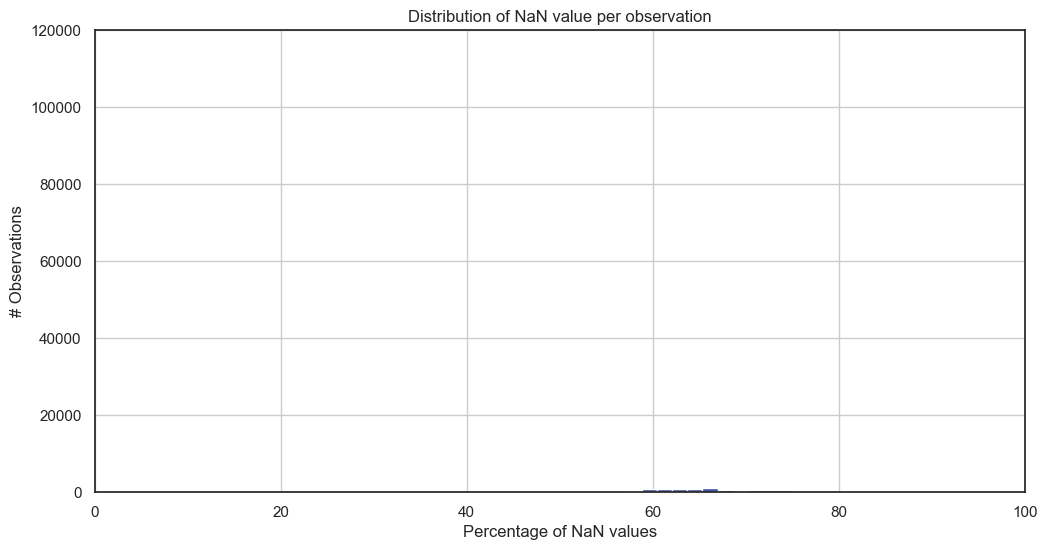

In [47]:
# Distribution of missing values per observation
nan_counts_obs = df.isnull().sum(axis=1) / df.shape[1] * 100
nan_counts_obs.hist(bins=20, figsize=(12, 6), color=['#4352a2'])

plt.xlim((0, 100))
plt.ylim((0, 120000))
plt.xlabel('Percentage of NaN values')
plt.ylabel('# Observations')
plt.title('Distribution of NaN value per observation')
plt.show()

In [48]:
# Utility function: 
# Get the top occurencies 
def get_top_occurencies(df, cols, n=10):
    count = df.groupby(cols).size().sort_values(ascending=False)
    count_percent = round(count / df.shape[0] * 100, 2)
    return pd.DataFrame({'count': count, 'count %': count_percent}).head(n)

# Utility function: 
# Get the top occurencies containing a regexp/string
def get_top_occurencies_containing(df, col, value, n=10):
    occurences = get_top_occurencies(df, col, df.shape[0])
    return occurences[occurences.index.str.contains(r'{}'.format(value))].head(n)

In [49]:
# Get the top contributors
get_top_occurencies(df, 'creator', n=10)

,count,count %
creator,,
kiliweb,4543,59.25
openfoodfacts-contributors,988,12.88
elcoco,140,1.83
javichu,135,1.76
tacite,135,1.76
sebleouf,133,1.73
moon-rabbit,102,1.33
openfood-ch-import,84,1.10
twoflower,79,1.03


In [50]:
# Check if there are other data from external databases
get_top_occurencies_containing(df, 'creator', value='import|load|dump|database|db|\-', n=20)

,count,count %
creator,,
openfoodfacts-contributors,988,12.88
moon-rabbit,102,1.33
openfood-ch-import,84,1.10
date-limite-app,32,0.42
smoothie-app,27,0.35
waistline-app,15,0.20
usda-ndb-import,12,0.16
halal-app-chakib,9,0.12
sophie-turbigo,7,0.09


In [52]:
# Define the mapping
mapping = {
    'usda-ndb-import': 'usda',
    'openfood-ch-import': 'foodrepo'
}

# Create the 'source' column based on the mapping
df.loc[:, 'source'] = df['creator'].map(mapping)

# Fill missing values in 'source' column with 'openfoodfacts'
df['source'].fillna(value='openfoodfacts', inplace=True)

# Define a function to get top occurrences
def get_top_occurrences(dataframe, column):
    return dataframe[column].value_counts()

# Call the function to get top occurrences of 'source'
top_source_occurrences = get_top_occurrences(df, 'source')

print(top_source_occurrences)

source
openfoodfacts    7572
foodrepo           84
usda               12
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3027788824.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['source'].fillna(value='openfoodfacts', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5308\3027788824.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'].fillna(value='openfoodfacts', inplace=True)


In [53]:
# More common countries grouped by source
get_top_occurencies(df, ['source', 'countries'], n=10)

count  count %
source        countries                     
openfoodfacts France           3792    49.45
              Spain             420     5.48
              Italy             373     4.86
              Germany           280     3.65
              España            267     3.48
              Deutschland       179     2.33
              Belgium           151     1.97
              United Kingdom    114     1.49
              Switzerland        74     0.97
              France,Germany     57     0.74

In [54]:
# Get some examples of states_tags values
get_top_occurencies(df, 'states_tags', 5)

,count,count %
states_tags,,
"en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-selected,en:front-photo-selected,en:photos-uploaded",1125,14.67
"en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-selected,en:front-photo-selected,en:photos-uploaded",688,8.97
"en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-to-be-selected,en:front-photo-selected,en:photos-uploaded",654,8.53
"en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-selected,en:front-photo-selected,en:photos-uploaded",515,6.72
"en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:origins-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:packaging-photo-to-be-selected,en:nutrition-photo-selected,en:ingredients-photo-selected,en:front-photo-selected,en:photos-uploaded",419,5.46


In [55]:
# 1. Extract all the states (return a multi-indexed Series with extracted states as value, <code + match> | state)
# During extraction, we give the name: states to the extracted group
df_states = df.states.str.extractall(r"en:(?P<states>[^,]+)")
df_states.head()

states
code          match                                
0000101209159 0                     to-be-completed
              1           nutrition-facts-completed
              2         ingredients-to-be-completed
              3           expiration-date-completed
              4      packaging-code-to-be-completed

In [56]:
# 2. Pivot the table to have one variable for each individual state 
# (we need to reset the index and create a column value to pivot the table)
df_states.reset_index(inplace=True)
df_states['values'] = 1
df_states = df_states.pivot_table(index='code', columns='states', values='values', fill_value=0)
df_states.head()

states,brands-completed,brands-to-be-completed,categories-completed,categories-to-be-completed,characteristics-completed,characteristics-to-be-completed,checked,complete,expiration-date-completed,expiration-date-to-be-completed,...,photos-to-be-uploaded,photos-to-be-validated,photos-uploaded,photos-validated,product-name-completed,product-name-to-be-completed,quantity-completed,quantity-to-be-completed,to-be-checked,to-be-completed
code,,,,,,,,,,,,,,,,,,,,,
0000101209159,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
00071185,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
0009542005979,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
0009542009984,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
0009542037949,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [57]:
# 3. Keep only the completed states (remove the empty state and states containing to-be)
columns_to_drop = df_states.columns[df_states.columns.str.contains(r'to-be|empty')]
df_states.drop(axis=1, columns=columns_to_drop, inplace=True)
df_states.head()

states,brands-completed,categories-completed,characteristics-completed,checked,complete,expiration-date-completed,front-photo-selected,ingredients-completed,ingredients-photo-selected,nutrition-facts-completed,nutrition-photo-selected,origins-completed,packaging-code-completed,packaging-completed,packaging-photo-selected,photos-uploaded,photos-validated,product-name-completed,quantity-completed
code,,,,,,,,,,,,,,,,,,,
0000101209159,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
00071185,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
0009542005979,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
0009542009984,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
0009542037949,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [58]:
# Join the source variable
df_states = df_states.join(df.source, how='inner')

## Saved Dataframe for future use

In [ ]:
# Save DataFrame to Parquet format
df.to_parquet('saved_dataframe.parquet')